### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, as well as source and sell products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [6]:
#view the tail of the dataframe
reviews.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [7]:
# Explore the DataFrames with the appropriate functions
#determining the size and shape of the data sets
#Use this to assess how many expected columns and rows are there as a reference point for when you manipulate the data
#Use this to assess datatypes and whether you need to convert columns into other data types
print(reviews.shape)
print(reviews.dtypes)

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [8]:
#Assess the data from another vantage point
reviews.info

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

In [9]:
# Any missing values?
#Determine the number of rows that contain missing values.
#Create a dataframe with the rows that have missing values
#Assess the shape of the dataframe consisting of rows that have missing values
#We can see the reviews data has no rows with missing values
reviews_na = reviews[reviews.isna().any(axis=1)]

reviews_na.shape

(0, 11)

In [10]:
# Descriptive statistics.
#Get an overall statistica description of the reviews data
#The astype function ensures that the data appears as an integer as opposed to an exponential value
reviews.describe().apply(lambda x: x.astype('int'))

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000,2000,2000,2000,2000
mean,39,48,50,1578,4320
std,13,23,26,1283,3148
min,17,12,1,25,107
25%,29,30,32,772,1589
50%,38,47,50,1276,3624
75%,49,63,73,1751,6654
max,72,112,99,6847,11086


In [11]:
#tried a standard .describe() function to see if it produced non exponential values
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [12]:
# Solution - drop columns
reviews = reviews.drop(['language','platform'], axis=1)

# View column names.
# We can see that lanuage and platform have been removed from the dataframe
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 3. Rename columns

In [13]:
# Solution - rename columns
reviews = reviews.rename(columns={'renumeration (k£)': 'remuneration £K',
                                  'spending_score (1-100)': 'spending_score'})
# view the data frame to check columns have been renamed
reviews

,gender,age,remuneration (k£),spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 4. Save the DataFrame as a CSV file

In [14]:
# Students can use their own file name.
reviews.to_csv('reviewsdata.csv', index=False)


In [15]:
#load the data and ensure that the first column is the index column with the below code
# credot https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv
reviews = pd.read_csv('reviewsdata.csv')
reviews

,gender,age,remuneration (k£),spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [16]:
# Solution - spending vs loyalty
# Independent variable
X = reviews['spending_score']

# Dependent variable
y = reviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = reviews).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        10:53:53   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [18]:
# Set the the X coefficient and the constant to generate the regression table:
y_pred = 33.061693 * reviews['spending_score'] - 75.052663

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

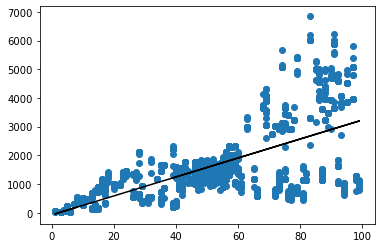

In [19]:
# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='black') 

### 5b) renumeration vs loyalty

In [20]:
# Solution - renumeration vs loyalty
# Independent variable
X = reviews['remuneration (k£)']

# Dependent variable
y = reviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = reviews).fit()
print(test.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        10:53:55   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [22]:
# Set the the X coefficient and the constant to generate the regression table:
y_pred = 34.187825 * reviews['remuneration (k£)'] - 65.686513

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration (k£), Length: 2000, dtype: float64

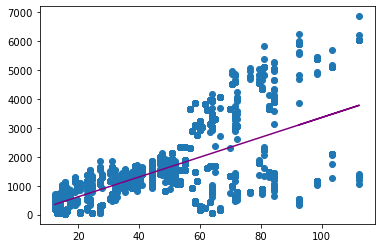

In [23]:
# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='purple') 


### 5c) age vs loyalty

In [24]:
# Solution - age vs loyalty

# Independent variable
X = reviews['age']

# Dependent variable
y = reviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = reviews).fit()
print(test.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0577
Time:                        10:53:58   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

In [25]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [26]:
# Set the the X coefficient and the constant to generate the regression table:
y_pred = -4.012805 * reviews['age'] + 1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

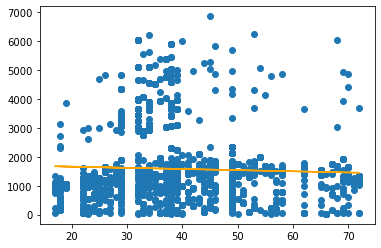

In [27]:
# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='orange') 

In [28]:
malereviews = reviews.loc[reviews['gender'].isin(['Male'])]
femalereviews = reviews.loc[reviews['gender'].isin(['Female'])]
graduatereviews = reviews.loc[reviews['education'].isin(['graduate', 'postgraduate'])]

In [29]:
# Students can use their own file name.
malereviews.to_csv('malereviews.csv', index=False)

In [30]:
#load the data and ensure that the first column is the index column with the below code
# credot https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv
malereviews = pd.read_csv('malereviews.csv')
malereviews

,gender,age,remuneration (k£),spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Male,66,15.58,3,31,PhD,1031,Could be better but its still great. I love th...,Great but could be even better
3,Male,69,15.58,14,138,diploma,1463,Works very well,Five Stars
4,Male,39,16.40,13,150,graduate,1506,"It sounded like a really amazing concept, but ...",Fell completely flat...
...,...,...,...,...,...,...,...,...,...
875,Male,32,98.40,16,1017,PhD,979,What a fun game! Someone brought this to game ...,Great for fans of scrabble and crosswords- for...
876,Male,35,84.46,17,969,PhD,254,Great game to keep the mind active. We play i...,Great game to keep the mind active
877,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
878,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     848.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          4.55e-131
Time:                        10:54:04   Log-Likelihood:                -7275.8
No. Observations:                 880   AIC:                         1.456e+04
Df Residuals:                     878   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -112.1077     65.291     -1.717      0.0

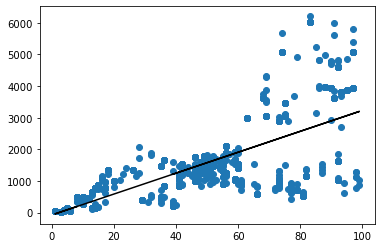

In [31]:
# Solution - spending vs loyalty
# Independent variable
X = malereviews['spending_score']

# Dependent variable
y = malereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = malereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

# Set the the X coefficient and the constant to generate the regression table:
y_pred = 33.061693 * malereviews['spending_score'] - 75.052663

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='black') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     800.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.76e-133
Time:                        10:54:05   Log-Likelihood:                -9273.9
No. Observations:                1120   AIC:                         1.855e+04
Df Residuals:                    1118   BIC:                         1.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -38.8665     64.608     -0.602      0.5

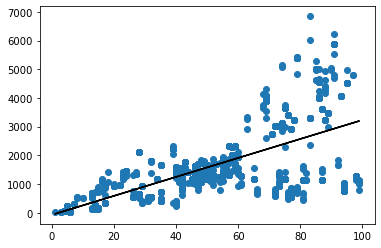

In [32]:
# Solution - spending vs loyalty
# Independent variable
X = femalereviews['spending_score']

# Dependent variable
y = femalereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = femalereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

# Set the the X coefficient and the constant to generate the regression table:
y_pred = 33.061693 * femalereviews['spending_score'] - 75.052663

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='black') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1111.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.73e-176
Time:                        10:54:05   Log-Likelihood:                -10747.
No. Observations:                1300   AIC:                         2.150e+04
Df Residuals:                    1298   BIC:                         2.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -137.1383     58.702     -2.336      0.0

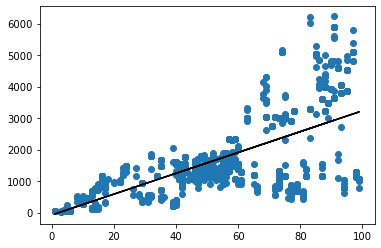

In [33]:
# Solution - spending vs loyalty
# Independent variable
X = graduatereviews['spending_score']

# Dependent variable
y = graduatereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = graduatereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

# Set the the X coefficient and the constant to generate the regression table:
y_pred = 33.061693 * graduatereviews['spending_score'] - 75.052663

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='black') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     379.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.75e-70
Time:                        10:54:06   Log-Likelihood:                -7415.3
No. Observations:                 880   AIC:                         1.483e+04
Df Residuals:                     878   BIC:                         1.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.6407     87.153      0.168      0.8

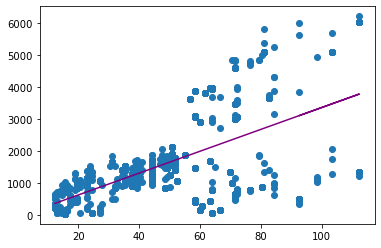

In [34]:
# Solution - renumeration vs loyalty
# Independent variable
X = malereviews['remuneration (k£)']

# Dependent variable
y = malereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = malereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

# Set the the X coefficient and the constant to generate the regression table:
y_pred = 34.187825 * malereviews['remuneration (k£)'] - 65.686513

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='purple') 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     935.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          8.37e-150
Time:                        10:54:07   Log-Likelihood:                -9235.9
No. Observations:                1120   AIC:                         1.848e+04
Df Residuals:                    1118   BIC:                         1.849e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -134.9913     63.112     -2.139      0.0

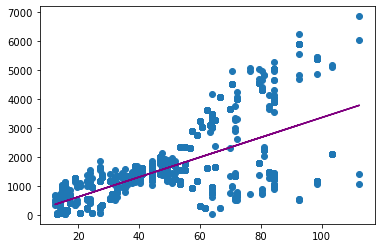

In [35]:
# Solution - renumeration vs loyalty
# Independent variable
X = femalereviews['remuneration (k£)']

# Dependent variable
y = femalereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = femalereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

# Set the the X coefficient and the constant to generate the regression table:
y_pred = 34.187825 * femalereviews['remuneration (k£)'] - 65.686513

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='purple') 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     814.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.20e-139
Time:                        10:54:07   Log-Likelihood:                -10832.
No. Observations:                1300   AIC:                         2.167e+04
Df Residuals:                    1298   BIC:                         2.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -115.1681     66.750     -1.725      0.0

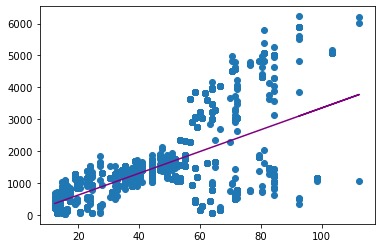

In [36]:
# Solution - renumeration vs loyalty
# Independent variable
X = graduatereviews['remuneration (k£)']

# Dependent variable
y = graduatereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = graduatereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

# Set the the X coefficient and the constant to generate the regression table:
y_pred = 34.187825 * graduatereviews['remuneration (k£)'] - 65.686513

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='purple') 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.146
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.143
Time:                        10:54:08   Log-Likelihood:                -7572.2
No. Observations:                 880   AIC:                         1.515e+04
Df Residuals:                     878   BIC:                         1.516e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1721.3316    126.072     13.654      0.0

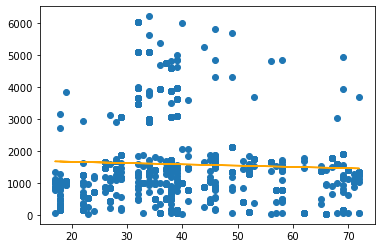

In [37]:
# Solution - age vs loyalty

# Independent variable
X = malereviews['age']

# Dependent variable
y = malereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = malereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

# Set the the X coefficient and the constant to generate the regression table:
y_pred = -4.012805 * malereviews['age'] + 1736.517739

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='orange') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.228
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.268
Time:                        10:54:09   Log-Likelihood:                -9575.8
No. Observations:                1120   AIC:                         1.916e+04
Df Residuals:                    1118   BIC:                         1.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1734.9031    126.319     13.734      0.0

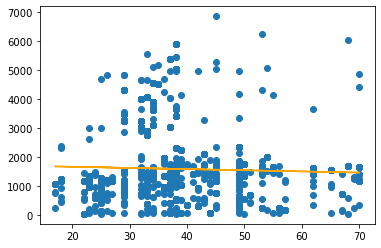

In [38]:
# Solution - age vs loyalty

# Independent variable
X = femalereviews['age']

# Dependent variable
y = femalereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = femalereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

# Set the the X coefficient and the constant to generate the regression table:
y_pred = -4.012805 * femalereviews['age'] + 1736.517739

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='orange') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8834
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.347
Time:                        10:54:09   Log-Likelihood:                -11148.
No. Observations:                1300   AIC:                         2.230e+04
Df Residuals:                    1298   BIC:                         2.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1517.0027    109.850     13.810      0.0

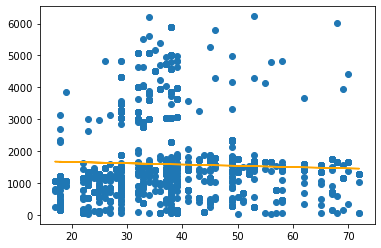

In [39]:
# Solution - age vs loyalty

# Independent variable
X = graduatereviews['age']

# Dependent variable
y = graduatereviews['loyalty_points']

# OLS model
f = 'y ~ X'
test = ols(f, data = graduatereviews).fit()
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

# Set the the X coefficient and the constant to generate the regression table:
y_pred = -4.012805 * graduatereviews['age'] + 1736.517739

# View the output.
y_pred

# Plot graph with regression line.
plt.scatter(X,y)
plt.plot(X, y_pred, color='orange') 

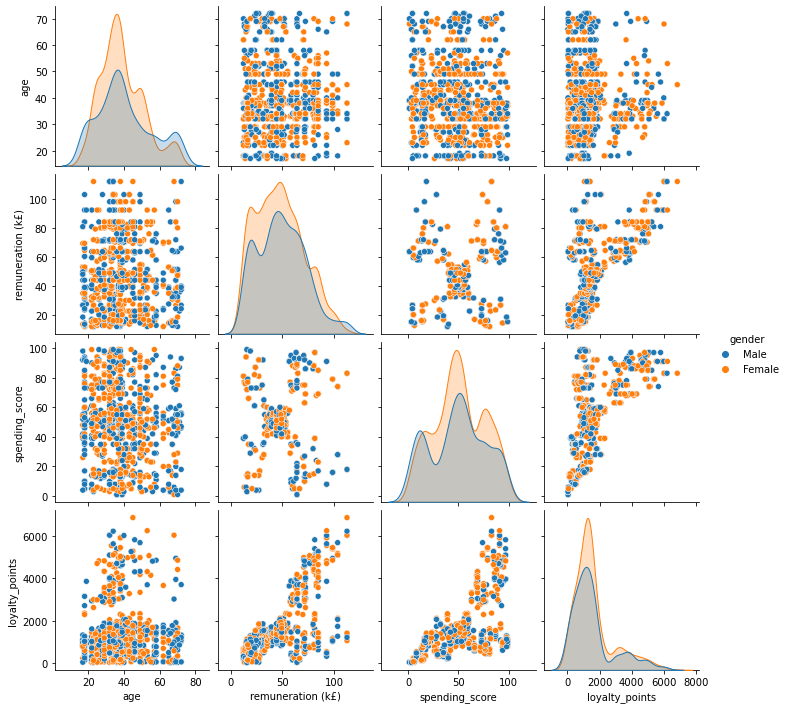

In [40]:
#Look at the behavior between classes of people in a time efficient manner (Gender)
var = reviews[['age', 'remuneration (k£)', 'spending_score', 'loyalty_points']]

sns.pairplot(reviews, vars=var, hue='gender', diag_kind= 'kde')

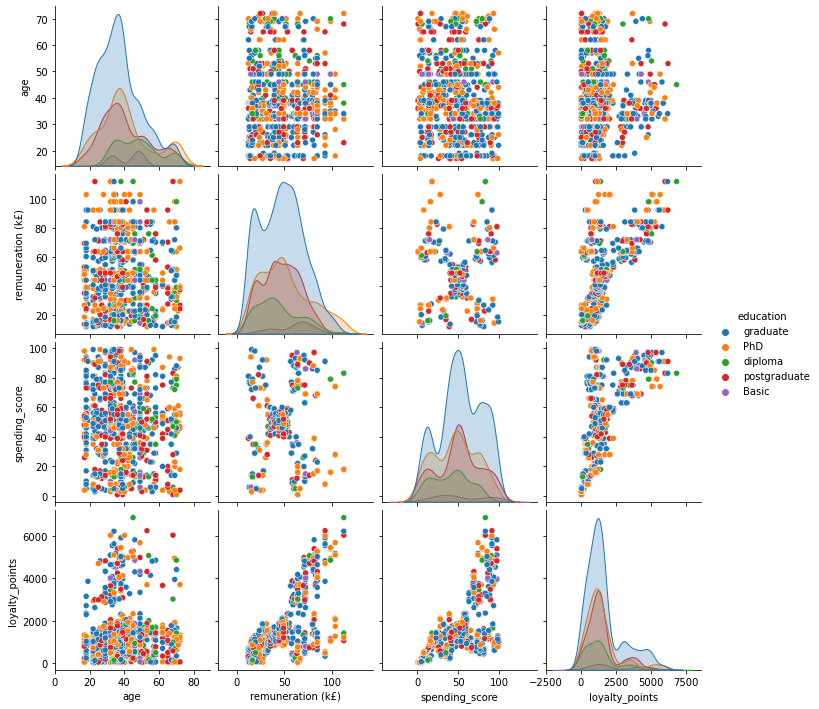

In [41]:
#Look at the behavior between classes of people in a time efficient manner (education)
var = reviews[['age', 'remuneration (k£)', 'spending_score', 'loyalty_points']]

sns.pairplot(reviews, vars=var, hue='education', diag_kind= 'kde')

(array([170., 210., 320., 460., 210., 230., 120.,  80.,  60., 140.]),
 array([17. , 22.5, 28. , 33.5, 39. , 44.5, 50. , 55.5, 61. , 66.5, 72. ]),
 <BarContainer object of 10 artists>)

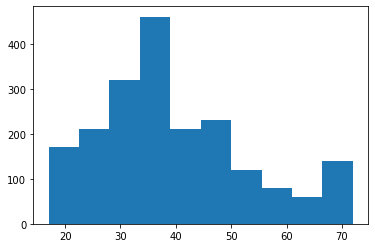

In [42]:
#create histogram to understand the type of people sharing comments
plt.hist(reviews['age'])

(array([322., 235., 287., 372., 224., 297.,  88.,  80.,  55.,  40.]),
 array([ 12.3  ,  22.304,  32.308,  42.312,  52.316,  62.32 ,  72.324,
         82.328,  92.332, 102.336, 112.34 ]),
 <BarContainer object of 10 artists>)

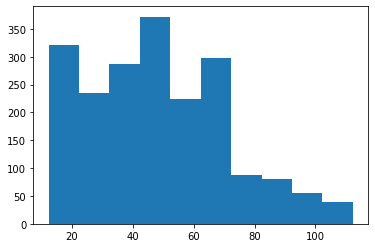

In [43]:
#create histogram to understand the type of people sharing comments
plt.hist(reviews['remuneration (k£)'])

(array([163., 215., 100., 171., 332., 355., 122., 239., 143., 160.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

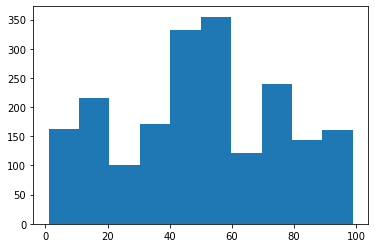

In [44]:
#create histogram to understand the type of people sharing comments
plt.hist(reviews['spending_score'])

(array([444., 724., 432.,  55., 103., 116.,  51.,  52.,  20.,   3.]),
 array([  25. ,  707.2, 1389.4, 2071.6, 2753.8, 3436. , 4118.2, 4800.4,
        5482.6, 6164.8, 6847. ]),
 <BarContainer object of 10 artists>)

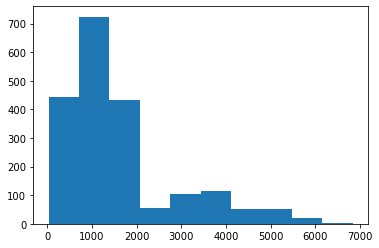

In [45]:
#create histogram to understand the type of people sharing comments
plt.hist(reviews['loyalty_points'])

## 6. Observations and insights

***Your observations here...***






In [46]:
# Correlation between loyalty points and remuneration and spending score
# No correlation between loyalty points and age
# Most comments produced by those who have between 0-2000 loyalty point
# Most comments produced by those between 35-40 years of age

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [47]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Load the CSV file(s).
df2 = pd.read_csv('reviewsdata.csv')

# View DataFrame.
df2


,gender,age,remuneration (k£),spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [49]:
# Drop unnecessary columns.
df2 = df2.drop(columns=['product', 'review', 'summary', 
                       'age', 'loyalty_points', 'education'])

df2


,gender,remuneration (k£),spending_score
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40
...,...,...,...
1995,Female,84.46,69
1996,Female,92.66,8
1997,Male,92.66,91
1998,Male,98.40,16


In [50]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   remuneration (k£)  2000 non-null   float64
 2   spending_score     2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [51]:
# Descriptive statistics.
df2.describe()

,remuneration (k£),spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration (k£)', ylabel='spending_score'>

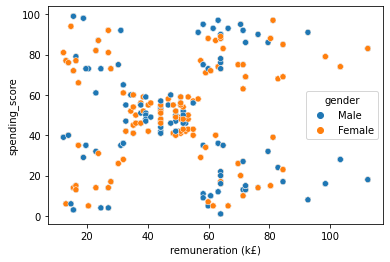

In [52]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration (k£)', y='spending_score', data=df2, hue='gender')

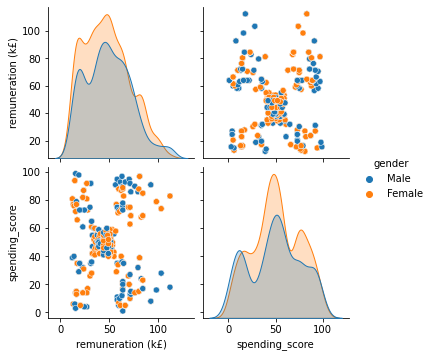

In [53]:
# Create a pairplot with Seaborn.
x = df2[['remuneration (k£)', 'spending_score']]

sns.pairplot(df2, vars=x, hue="gender", diag_kind= 'kde')

## 3. Elbow and silhoutte methods

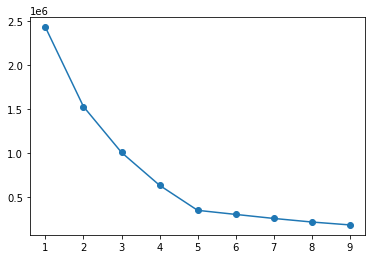

In [54]:
# Determine the number of clusters: Elbow method.
cs = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 10), cs, marker='o')
plt.xticks(range(1, 10))
plt.show()


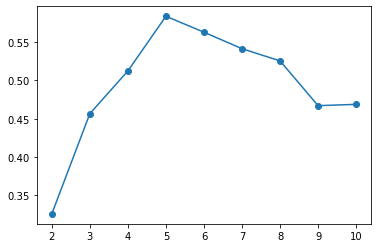

In [55]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k, random_state=0).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.show()

## 4. Evaluate k-means model at different values of *k*

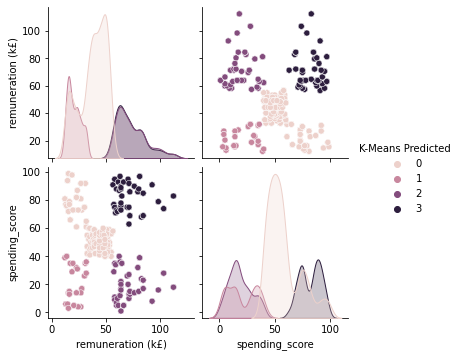

In [56]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

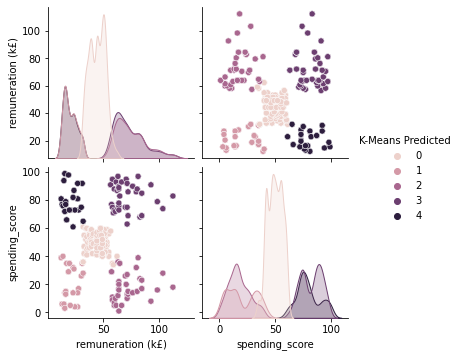

In [57]:
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

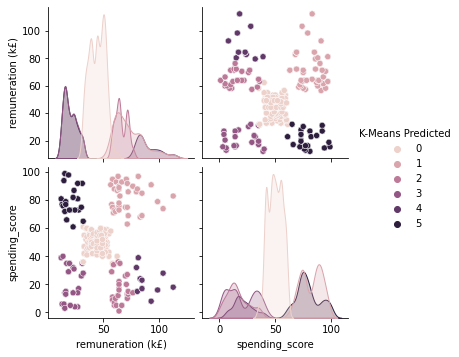

In [58]:
# Use 6 clusters.
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

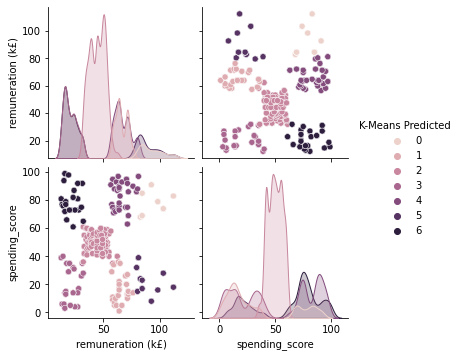

In [59]:
# Use 7 clusters.
kmeans = KMeans(n_clusters = 7, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

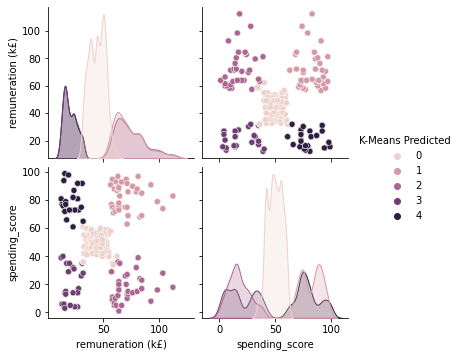

In [60]:
# Apply the final model.
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [61]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
1    356
2    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [62]:
#Visualising the clusters.
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters


x

,remuneration (k£),spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,4
2,13.12,6,3
3,13.12,77,4
4,13.94,40,3
...,...,...,...
1995,84.46,69,1
1996,92.66,8,2
1997,92.66,91,1
1998,98.40,16,2


<AxesSubplot:xlabel='remuneration (k£)', ylabel='spending_score'>

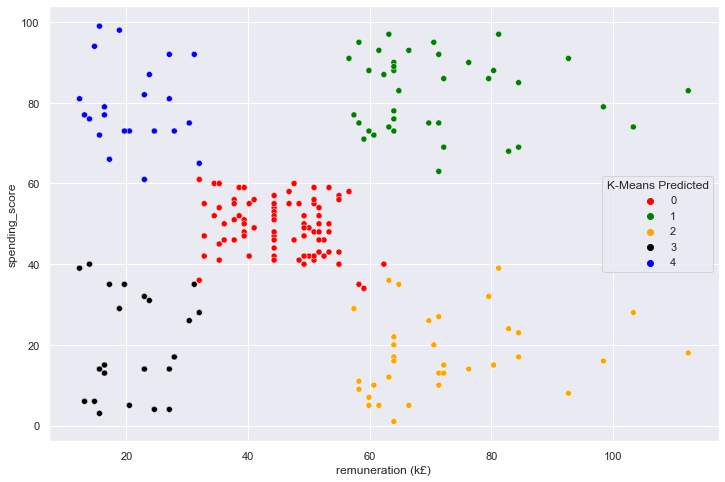

In [67]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration (k£)' , 
                y = 'spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'orange', 'black', 'blue'])

## 7. Discuss: Insights and observations

***Your observations here...***

In [68]:
# Ideal number of clusters = 5
# Richer audiences who spend less with Turtle Games is a distinct segment to target

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenize and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenization on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [69]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download ('stopwords')

!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
!pip install -U textblob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zikom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zikom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
# Load the data set.
df3 = pd.read_csv('reviewsdata.csv')

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [72]:
# Explore data set.
df3.info

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score  loyalty_points  \
0       Male   18              12.30              39             210   
1       Male   23              12.30              81             524   
2     Female   22              13.12               6              40   
3     Female   25              13.12              77             562   
4     Female   33              13.94              40             366   
...      ...  ...                ...             ...             ...   
1995  Female   37              84.46              69            4031   
1996  Female   43              92.66               8             539   
1997    Male   34              92.66              91            5614   
1998    Male   34              98.40              16            1048   
1999    Male   32              92.66               8             479   

     education  product                                             review  \
0     graduate      453  

In [73]:
#Drop columns
df3 = df3.drop(columns=['gender', 'age', 'remuneration (k£)', 'spending_score', 'loyalty_points', 'education', 'product'])
# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [74]:
# Any missing values?
#There are no missing values

df3_na = df3[reviews.isna().any(axis=1)]

df3_na

,review,summary


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [75]:
# Review & summary: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()
df3['summary'] = df3['summary'].str.lower()

df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it whe...,super fun
1997,great game for all.........\nkeeps the mind ni...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [76]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages (with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [77]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [78]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()

# View DataFrame.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenize and create wordclouds

In [79]:
# Create new DataFrame (copy DataFrame).
analysis = df3

# View DataFrame.
analysis

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [80]:
# Apply tokenization to both columns.
analysis['tokens_review'] = analysis['review'].apply(word_tokenize)
analysis['tokens_summary'] = analysis['summary'].apply(word_tokenize)


# View DataFrame.
analysis

,review,summary,tokens_review,tokens_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,great game did not think i would like it when...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1997,great game for all\nkeeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1998,fun game,four stars,"[fun, game]","[four, stars]"


In [87]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Review: Create a word cloud.
textt = " ".join(review for review in df3.review)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)

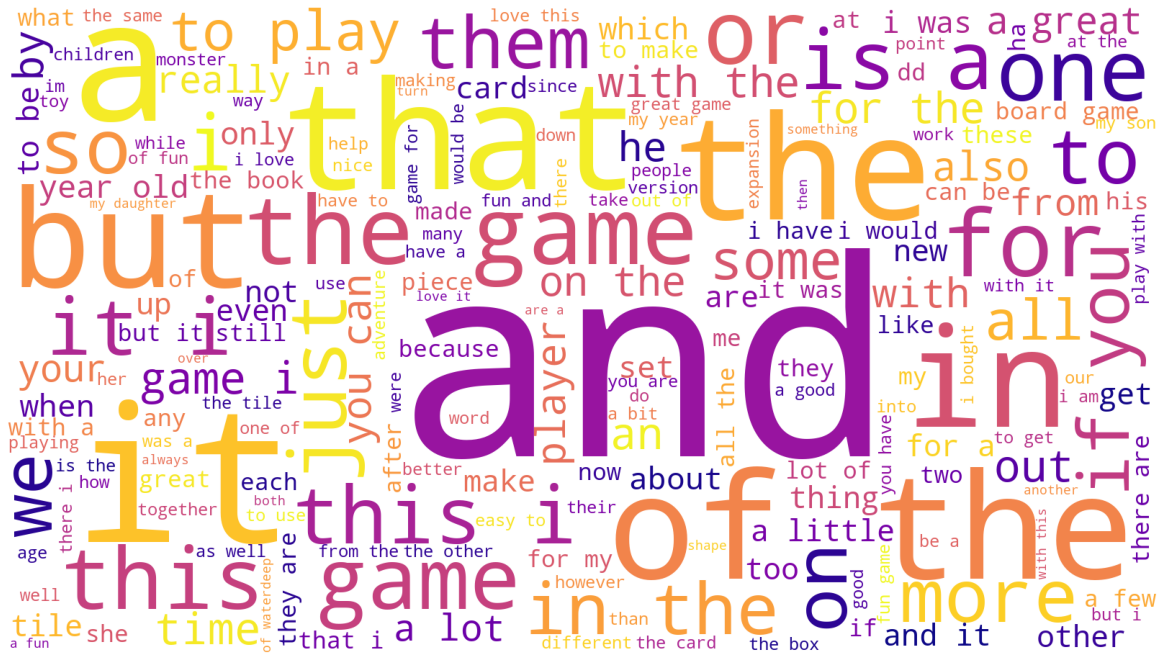

KeyError: 94

In [89]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df3.shape[0]):
    all_tokens = all_tokens + df3['tokens_review'][i]

In [91]:
# Summary: Create a word cloud.
textt = " ".join(review for review in df3.summary)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)

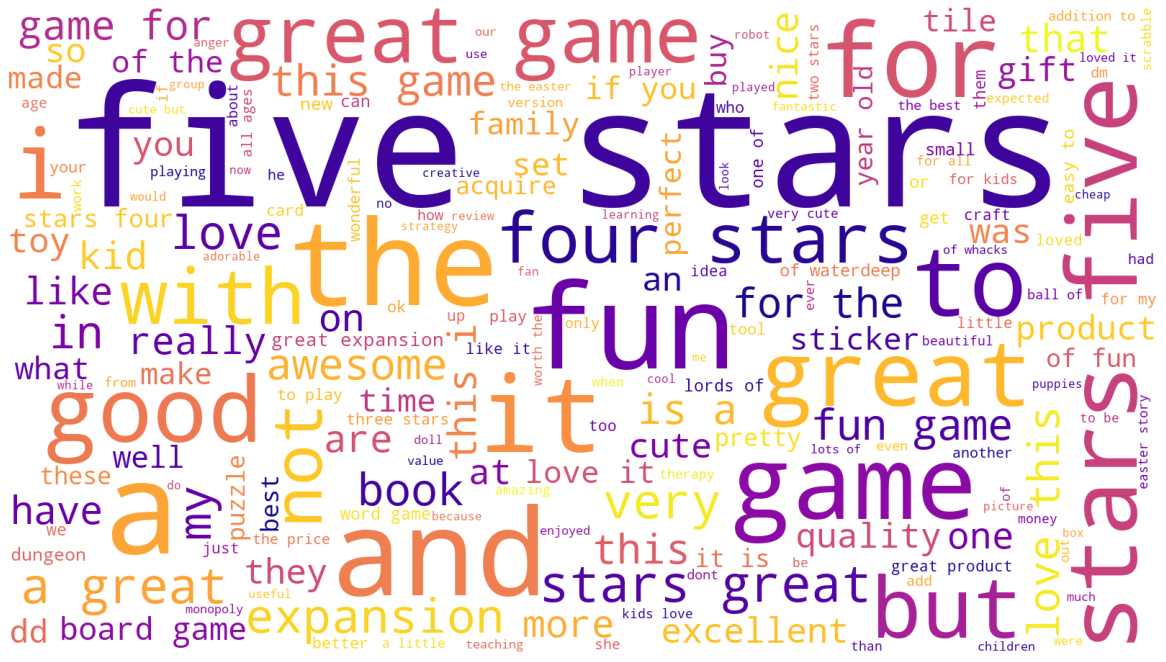

KeyError: 94

In [92]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df3.shape[0]):
    all_tokens = all_tokens + df3['tokens_summary'][i]

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

### 4b) Remove alphanumeric characters and stopwords

In [95]:
# Delete all the alpanum.
tokens = [word for word in all_tokens if word.isalnum()]

In [96]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))
tokens1 = [x for x in tokens if x.lower() not in english_stopwords]
tokens1_string = ''
for value in tokens1:
    tokens1_string = tokens1_string + value + ' '

### 4c) Create wordcloud without stopwords

In [97]:
# Create a word cloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 5).generate(tokens1_string)

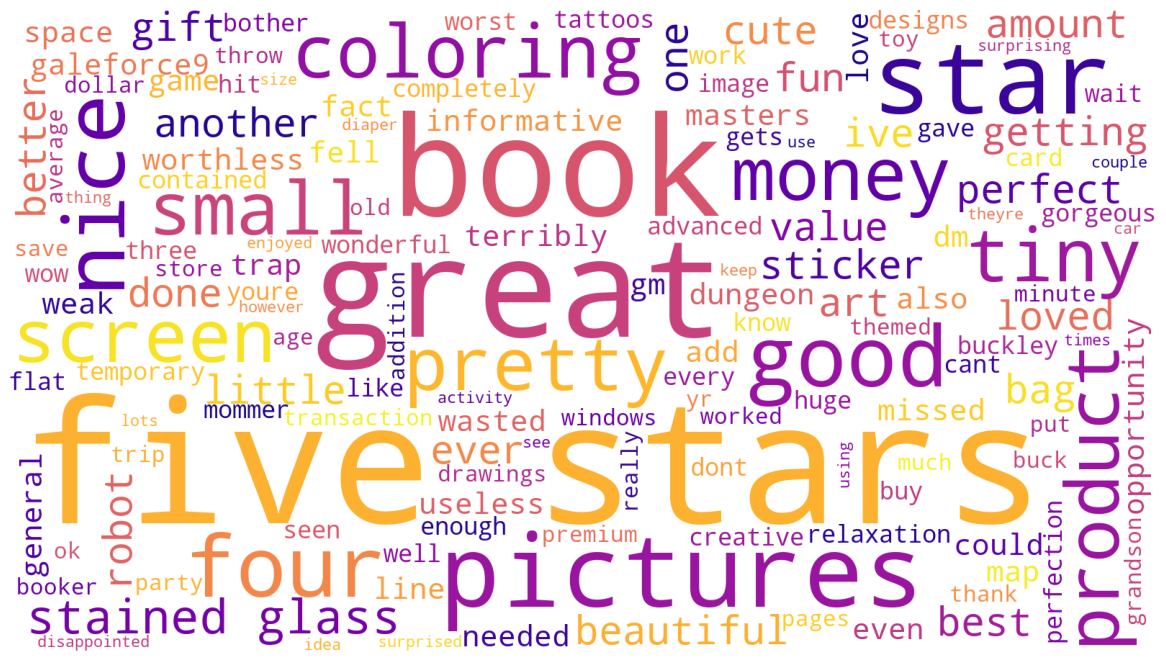

FreqDist({'stars': 26, 'five': 21, 'great': 13, 'book': 13, 'pictures': 6, 'good': 4, 'nice': 4, 'four': 4, 'screen': 3, 'pretty': 3, ...})

In [98]:
# Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

frequency_distribution_tokens1 = FreqDist(tokens1)
frequency_distribution_tokens1

### 4d) Identify 15 most common words and polarity

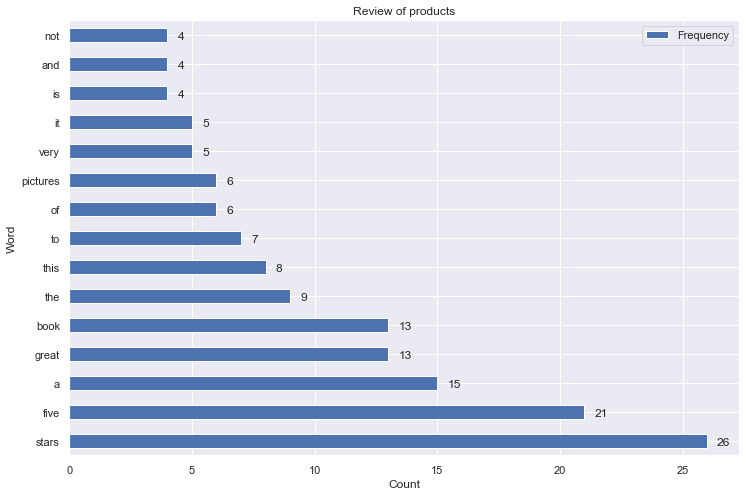

In [99]:
# Determine the 15 most common words.
'''top 15 commonly used words across the reviews.'''
# Generate DF out of Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
columns=['Word', 'Frequency']).set_index('Word')

ax = counts.plot(kind='barh')
ax.set_xlabel("Count")
ax.set_ylabel("Word")
ax.set_title("Review of products")
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()),
                                                       2)))

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [100]:
from textblob import TextBlob

In [101]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [102]:
# Determine polarity of both columns. 
analysis['polarity_review'] = analysis['review'].apply(generate_polarity)
analysis['polarity_summary'] = analysis['summary'].apply(generate_polarity)

# View output.
analysis

,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000
1996,great game did not think i would like it when...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667
1997,great game for all\nkeeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000
1998,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000


(array([  1.,   1.,   0.,   9.,  20.,  41., 113., 374., 467., 395., 214.,
        166.,  65.,  69.,  26.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
         1.        ]),
 <BarContainer object of 15 artists>)

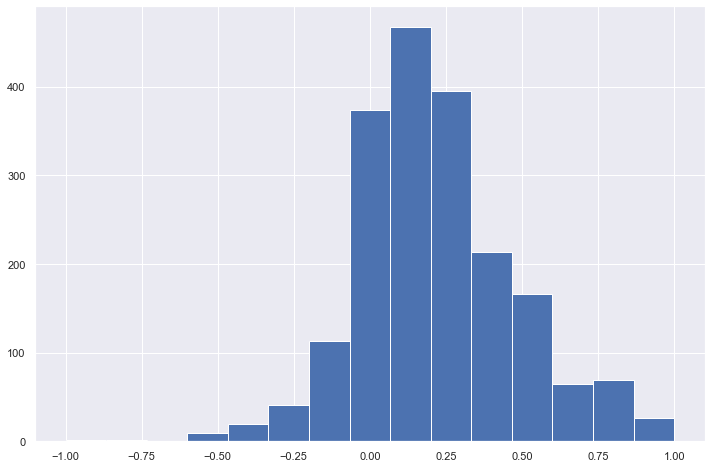

In [105]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15


plt.hist(analysis['polarity_review'], num_bins)



(array([  4.,   5.,   6.,  14.,  32.,  27.,  46., 829.,  92., 294., 114.,
        192.,  84., 145.,  77.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
         1.        ]),
 <BarContainer object of 15 artists>)

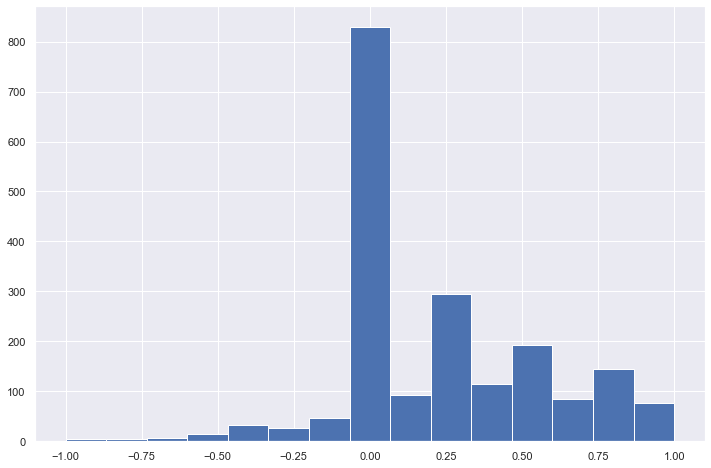

In [106]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15


plt.hist(analysis['polarity_summary'], num_bins)




In [111]:
#import stats module
from scipy import stats
#select values within 2 standard deviations of the mean
analysis1 = analysis[(np.abs(stats.zscore(analysis['polarity_summary'])) < 2)]

In [112]:
analysis1 = analysis[(np.abs(stats.zscore(analysis['polarity_review'])) < 2)]

(array([ 24.,  25.,  67., 109., 219., 254., 256., 210., 195., 124., 115.,
        122.,  33.,  38.,  41.]),
 array([-0.30555556, -0.2362963 , -0.16703704, -0.09777778, -0.02851852,
         0.04074074,  0.11      ,  0.17925926,  0.24851852,  0.31777778,
         0.38703704,  0.4562963 ,  0.52555556,  0.59481481,  0.66407407,
         0.73333333]),
 <BarContainer object of 15 artists>)

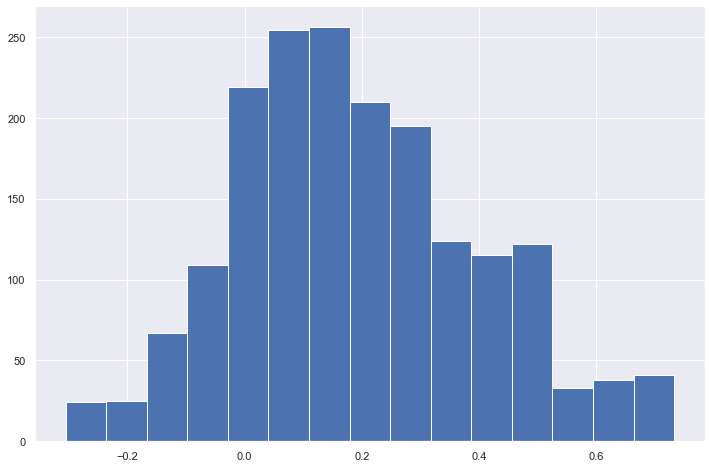

In [113]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15


plt.hist(analysis1['polarity_review'], num_bins)

(array([  3.,   5.,   6.,  11.,  29.,  26.,  45., 739.,  92., 292., 114.,
        188.,  81., 130.,  71.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
         1.        ]),
 <BarContainer object of 15 artists>)

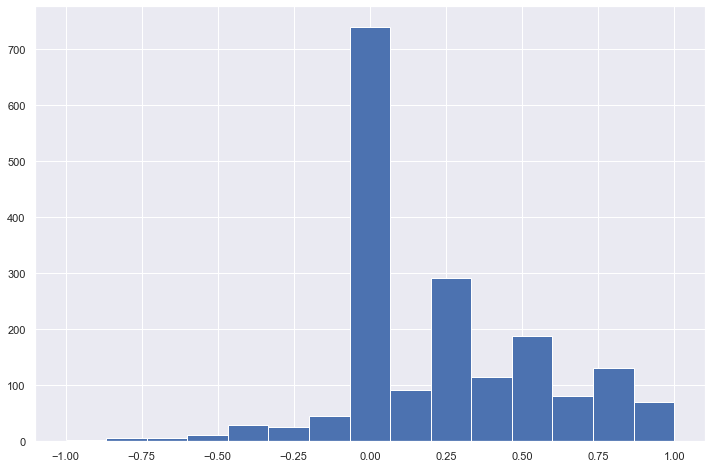

In [114]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15


plt.hist(analysis1['polarity_summary'], num_bins)

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [115]:
from scipy import stats


reviewsanalysis = analysis.drop(['summary', 'tokens_review', 'tokens_summary', 'polarity_summary'], axis=1)
#select values within 2 standard deviations of the mean
reviewsanalysis = reviewsanalysis[(np.abs(stats.zscore(reviewsanalysis['polarity_review'])) < 2)]
#Have the data descending largest to smallest
reviewsanalysis = reviewsanalysis.sort_values(by=['polarity_review'], ascending=False)

# View output.
reviewsanalysis

,review,polarity_review
582,precious and perfect way to read through the s...,0.733333
33,this book has wonderful pictures in it from dr...,0.716667
671,these adorable letters look great in my daught...,0.700000
1185,good set,0.700000
1535,granddaughter loved these,0.700000
...,...,...
186,hard to put together,-0.291667
1339,this expansion makes the base game superior in...,-0.293831
490,i like them but the kids get bored with all of...,-0.300000
1058,i like wizards of the coasts game\nnot bad i t...,-0.300000


In [116]:
# Top 20 negative summaries.
# Top 20 negative reviews.

summaryanalysis = analysis.drop(['review', 'tokens_review', 'tokens_summary', 'polarity_review'], axis=1)
#select values within 2 standard deviations of the mean
summaryanalysis = summaryanalysis[(np.abs(stats.zscore(summaryanalysis['polarity_summary'])) < 2)]
#Have the data descending largest to smallest
summaryanalysis = summaryanalysis.sort_values(by=['polarity_summary'], ascending=False)

# View output.
summaryanalysis


,summary,polarity_summary
1507,sturdy bright colors awesome,0.850000
155,beautiful,0.850000
1764,perfect item i loved it,0.850000
642,beautifully made,0.850000
35,beautiful coloring book,0.850000
...,...,...
847,worst quality adult board game ive even seen,-0.433333
13,very weak game,-0.443750
905,mediocre game,-0.450000
1096,dd bored game,-0.450000


In [117]:
# Top 20 positive reviews.
summaryanalysis_top20 = summaryanalysis.head(20)

# View output.
summaryanalysis_top20

,summary,polarity_summary
1507,sturdy bright colors awesome,0.850000
155,beautiful,0.850000
1764,perfect item i loved it,0.850000
642,beautifully made,0.850000
35,beautiful coloring book,0.850000
40,so beautiful,0.850000
309,she made four beautiful puppies from the kit a...,0.850000
703,great quality very cute and perfect for my tod...,0.816667
1190,great start for any wargamer looking for orcs ...,0.800000
508,great,0.800000


In [118]:
# Top 20 positive summaries.
reviewsanalysis_top20 = reviewsanalysis.head(20)


# View output.
reviewsanalysis_top20

,review,polarity_review
582,precious and perfect way to read through the s...,0.733333
33,this book has wonderful pictures in it from dr...,0.716667
671,these adorable letters look great in my daught...,0.700000
1185,good set,0.700000
1535,granddaughter loved these,0.700000
570,my grandson loved ited it,0.700000
64,nephew age 5 loved the booker,0.700000
1268,they are what they are supposed to be the card...,0.700000
70,age appropiate gson loved,0.700000
334,granddaughter loved it she took it along on v...,0.700000


In [119]:
# Top 20 negative reviews.
reviewsanalysis_bottom20 = reviewsanalysis.tail(20)

reviewsanalysis_bottom20

,review,polarity_review
400,its really helping my addr learn to discuss hi...,-0.250000
20,i dont know how well they work if theyre a mir...,-0.250000
572,its too small and too pricey,-0.250000
1870,a must have for game but be careful as a lot ...,-0.250000
1132,no more comments,-0.250000
247,its really annoying because when you click the...,-0.250000
93,this is a small book,-0.250000
359,this is horrible the directions are very hard ...,-0.255833
540,im an ot and i intended on using it with my ag...,-0.256250
376,im a therapist that works with children i pla...,-0.260069


In [120]:
# Top 20 negative summaries.
summaryanalysis_bottom20 = summaryanalysis.tail(20)

summaryanalysis_bottom20

,summary,polarity_summary
328,defective poor qc,-0.400000
950,cooperative dd board game,-0.400000
894,acquire game,-0.400000
790,aquire game,-0.400000
1782,seemingly poor quality,-0.400000
437,this game although it appears to be like uno a...,-0.400000
838,hall of fame game,-0.400000
1869,the handheld word game for scrabble lovers eve...,-0.400000
903,acquire game,-0.400000
831,5 star game 1 star version,-0.400000


## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# There is a positive polarity across reviews
# Top positive keywords tend in include the term 'great'
# negative keywords focus on lack of quality